# Palmer Penguins Dataset
This is a very simple project to actually explore the relatively new dataset open-sources sometimes ago. 
It's a light dataset and slightly noisy and thus provide enough working room and complexity for a beginner in ML. It requires some cleaning, and can be used to learn the classification models. This dataset is also great for nice visualization and 3D plotting.

## Importing the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook

In [2]:
df = pd.read_csv("F:\Akshay Files\DataSets\palmerpenguins.csv")
df.head(2)

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN


## Understanding the dataset (not really), cleaning and feature engineering.

In [3]:
columns_to_keep = ['Sample Number',
                   'Species',
                   'Region',
                   'Island',
                   'Stage',
                   'Culmen Length (mm)',
                   'Culmen Depth (mm)',
                   'Flipper Length (mm)',
                   'Body Mass (g)'
                   ]
df = df[columns_to_keep]
df.head(2)

,Sample Number,Species,Region,Island,Stage,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g)
0,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",39.1,18.7,181.0,3750.0
1,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",39.5,17.4,186.0,3800.0


In [5]:
df.set_index("Sample Number")
#df = df.dropna(inplace = True) # Not a good idea for this dataset
df.head(2)

,Sample Number,Species,Region,Island,Stage,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g)
0,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",39.1,18.7,181.0,3750.0
1,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",39.5,17.4,186.0,3800.0


#### Names of the species
The names are too long (also contains scientific names) , so just seperating the names and keeping the general specie name (pronounce-able names).

In [6]:
new = df["Species"].str.split("(", n = 1, expand = True) 
df["Species"] = new[0]
df["Name"] = new[1]
#df.head()

Also inputing the names to the model is not a great idea so I'm assigning an integer to the repective specie which will be the label.

There can be better ways to do this which I don't know about, corrections are welcome.

In [7]:
df["Label"] = new[0]
species = {'Adelie Penguin ':1, 'Chinstrap penguin ':2, 'Gentoo penguin ':3}
df.Label = [species[item] for item in df.Label]
#df.head()

It's time to split the dataset

In [8]:
from sklearn.model_selection import train_test_split

Remember we left the NaN fields untouched, so I'll just fill those fields with the average of that column. (I hope it's a nice idea).

#### I decided to choose these four features , although there are many other useful features in the dataset.

In [9]:
X = df[['Culmen Length (mm)','Culmen Depth (mm)','Flipper Length (mm)','Body Mass (g)']]
X = X.fillna(X.mean())
y = df['Label']
y = y.fillna(y.mean())

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

## Visualizing the cleaned datset 
Now we have to visulize the data  to see if it's actually differentiable and in what ways.

<IPython.core.display.Javascript object>


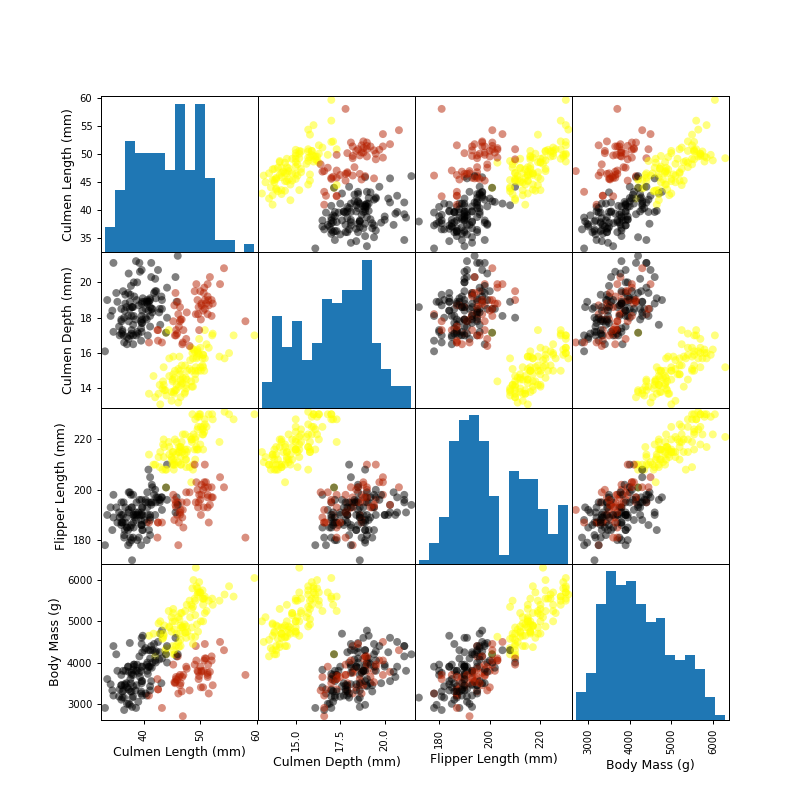

In [11]:
# plotting a scatter matrix
from matplotlib import cm
from pandas.plotting import scatter_matrix

cmap = cm.get_cmap('gnuplot')
scatter = scatter_matrix(X_train, c= y_train, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(9,9), cmap=cmap)

### Attractive bits of the project (^_^)
plotting the 3D plot gives a clear idea of how the data is clearly differentiable.

<IPython.core.display.Javascript object>


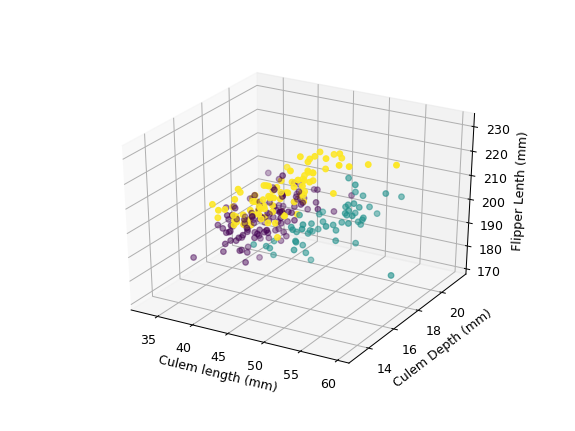

In [12]:

# plotting a 3D scatter plot
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X_train['Culmen Length (mm)'], X_train['Culmen Depth (mm)'], X_train['Flipper Length (mm)'], c = y_train, marker = 'o', s=20)
ax.set_xlabel('Culem length (mm)')
ax.set_ylabel('Culem Depth (mm)')
ax.set_zlabel('Flipper Lenth (mm)')
plt.show();

### Training the model(s)
#### KNN-Classifier
At this point I remember the syntax for KNN-Classifier word to word, so I'm going to implement it :)

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(X_train_scaled, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train_scaled, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test_scaled, y_test)))

Accuracy of K-NN classifier on training set: 0.99
Accuracy of K-NN classifier on test set: 0.99


#### DecisionTree-Classifier 
##### Using decision tree without max decision tree depth, the model is likely to overfit

And now I'll train a Decision Tree Classifier , it's handy and also very nice when plotted.

In [15]:
from sklearn.tree import DecisionTreeClassifier

#creating a model instance
clf = DecisionTreeClassifier().fit(X_train, y_train)

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.99


#### I'm going to plot the tree(s)
I could use " tree.plot_tree(tree_instance) " but it would be very hard to comprehend.
So we are providing the features and the labels to the graph and also keeping the "fill" on to colore the boxes, it makes the plots far better and readable.

In [16]:
from sklearn import tree

#tree.plot_tree(clf);

<IPython.core.display.Javascript object>


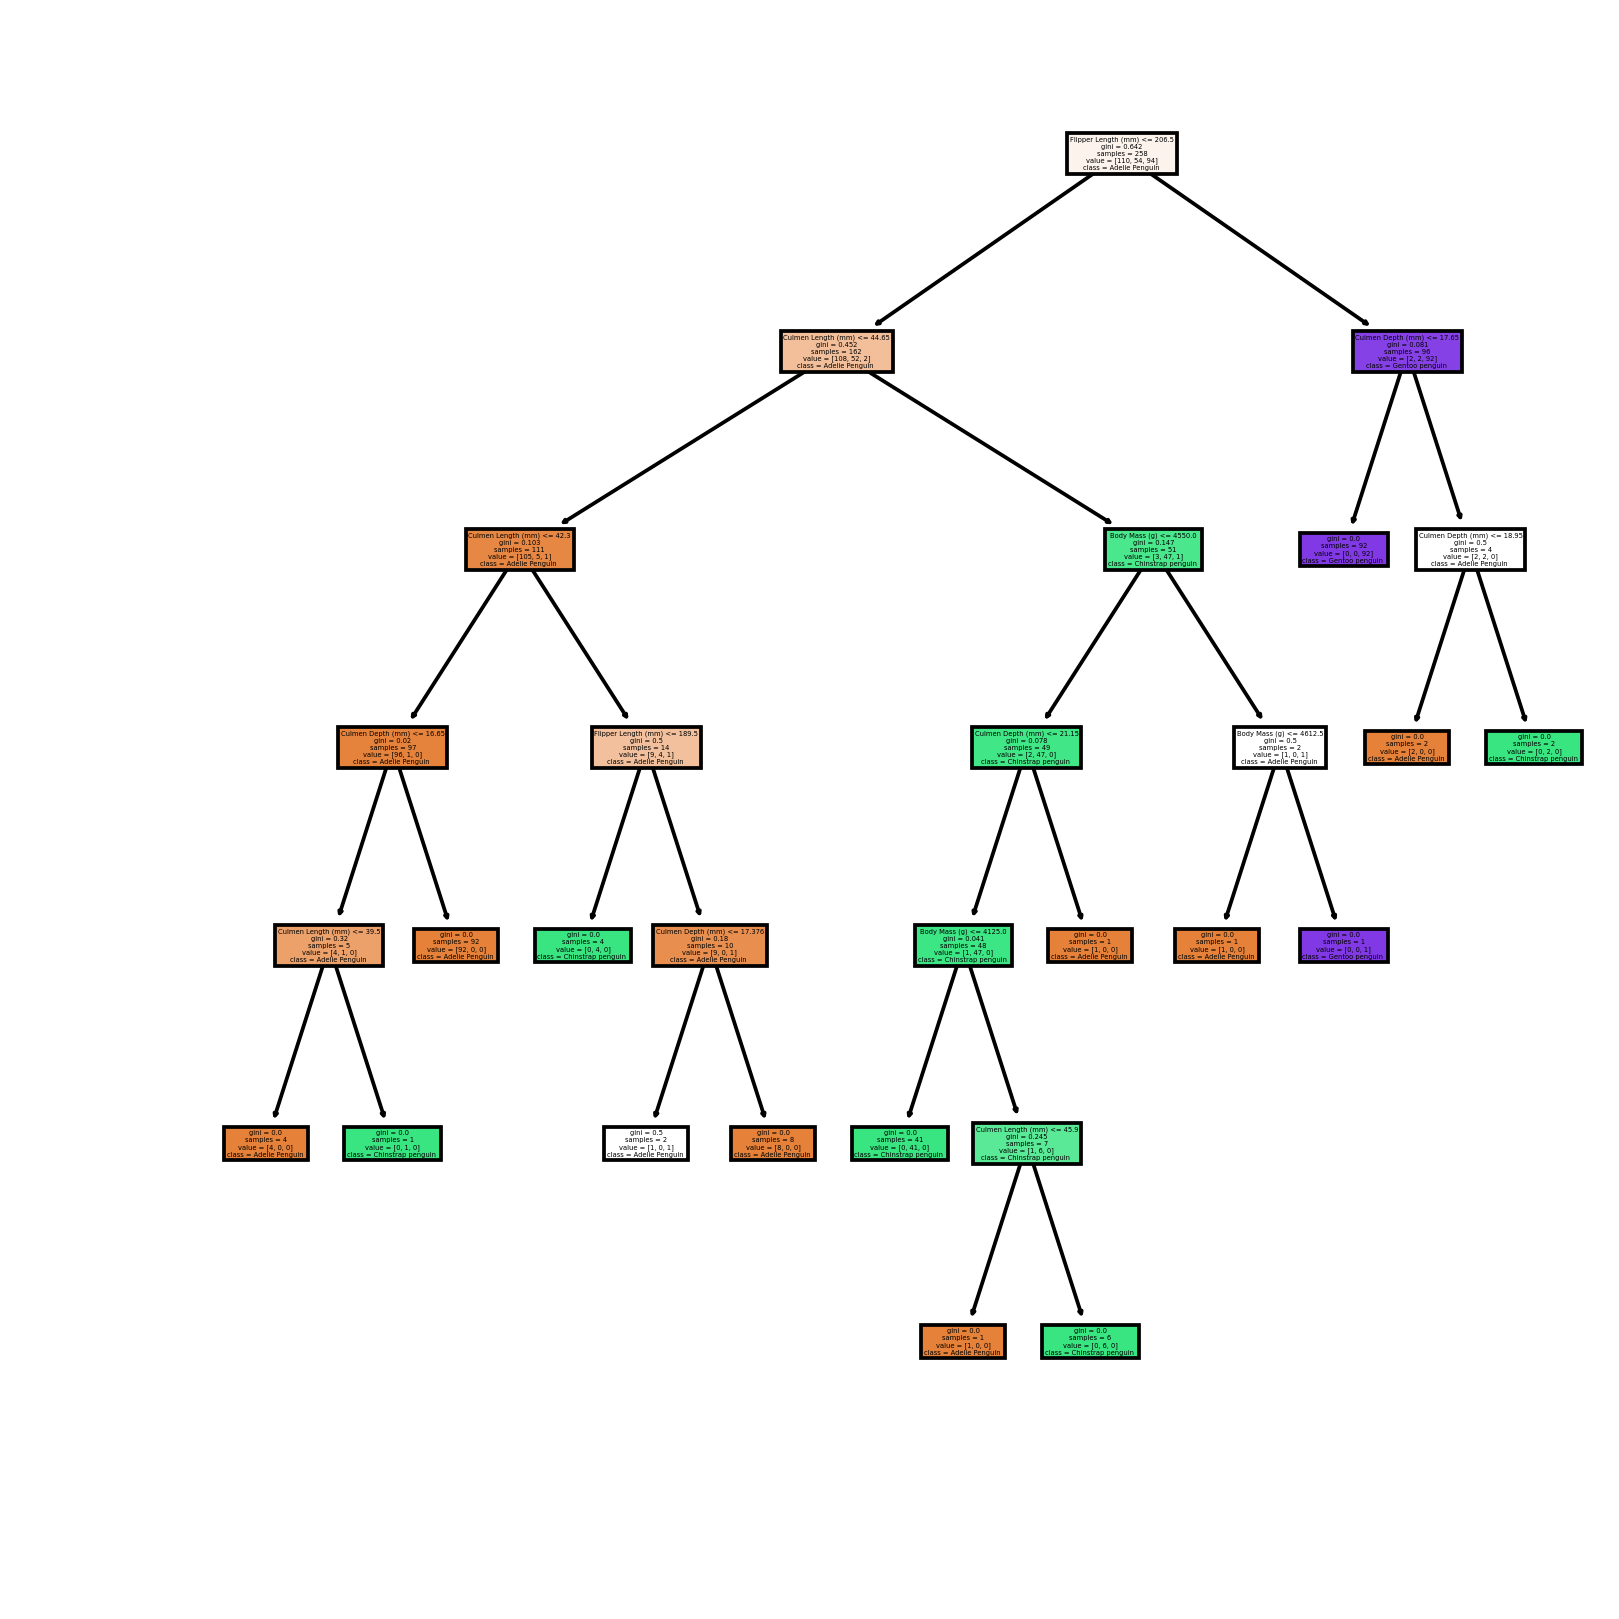

In [17]:
fn=['Culmen Length (mm)','Culmen Depth (mm)','Flipper Length (mm)','Body Mass (g)']
cn=['Adelie Penguin ', 'Chinstrap penguin ', 'Gentoo penguin ']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (6, 6), dpi=300)
tree.plot_tree(clf,
               feature_names = fn, 
               class_names=cn,
               filled = True);
#fig.savefig('Bad_tree.png')


I'm plotting the decision tree just to understand hoe the "max_depth" is helping to avoid overfit.
##### Also it looks cool :)

#### Avoiding Overfitting
To avoide overfitting we will use max_depth, in this case I tried 3 to 7 and 4 seems to work best (0-4). 
Also I don't know if there is a way to "calculate" the the optimum value for max_depth, point out if there is.

In [18]:
clf2 = DecisionTreeClassifier(max_depth = 4).fit(X_train, y_train)

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf2.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf2.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 0.99
Accuracy of Decision Tree classifier on test set: 0.99


See how the train accuracy decreased and the test accuracy increased by avoiding overfitting.

<IPython.core.display.Javascript object>


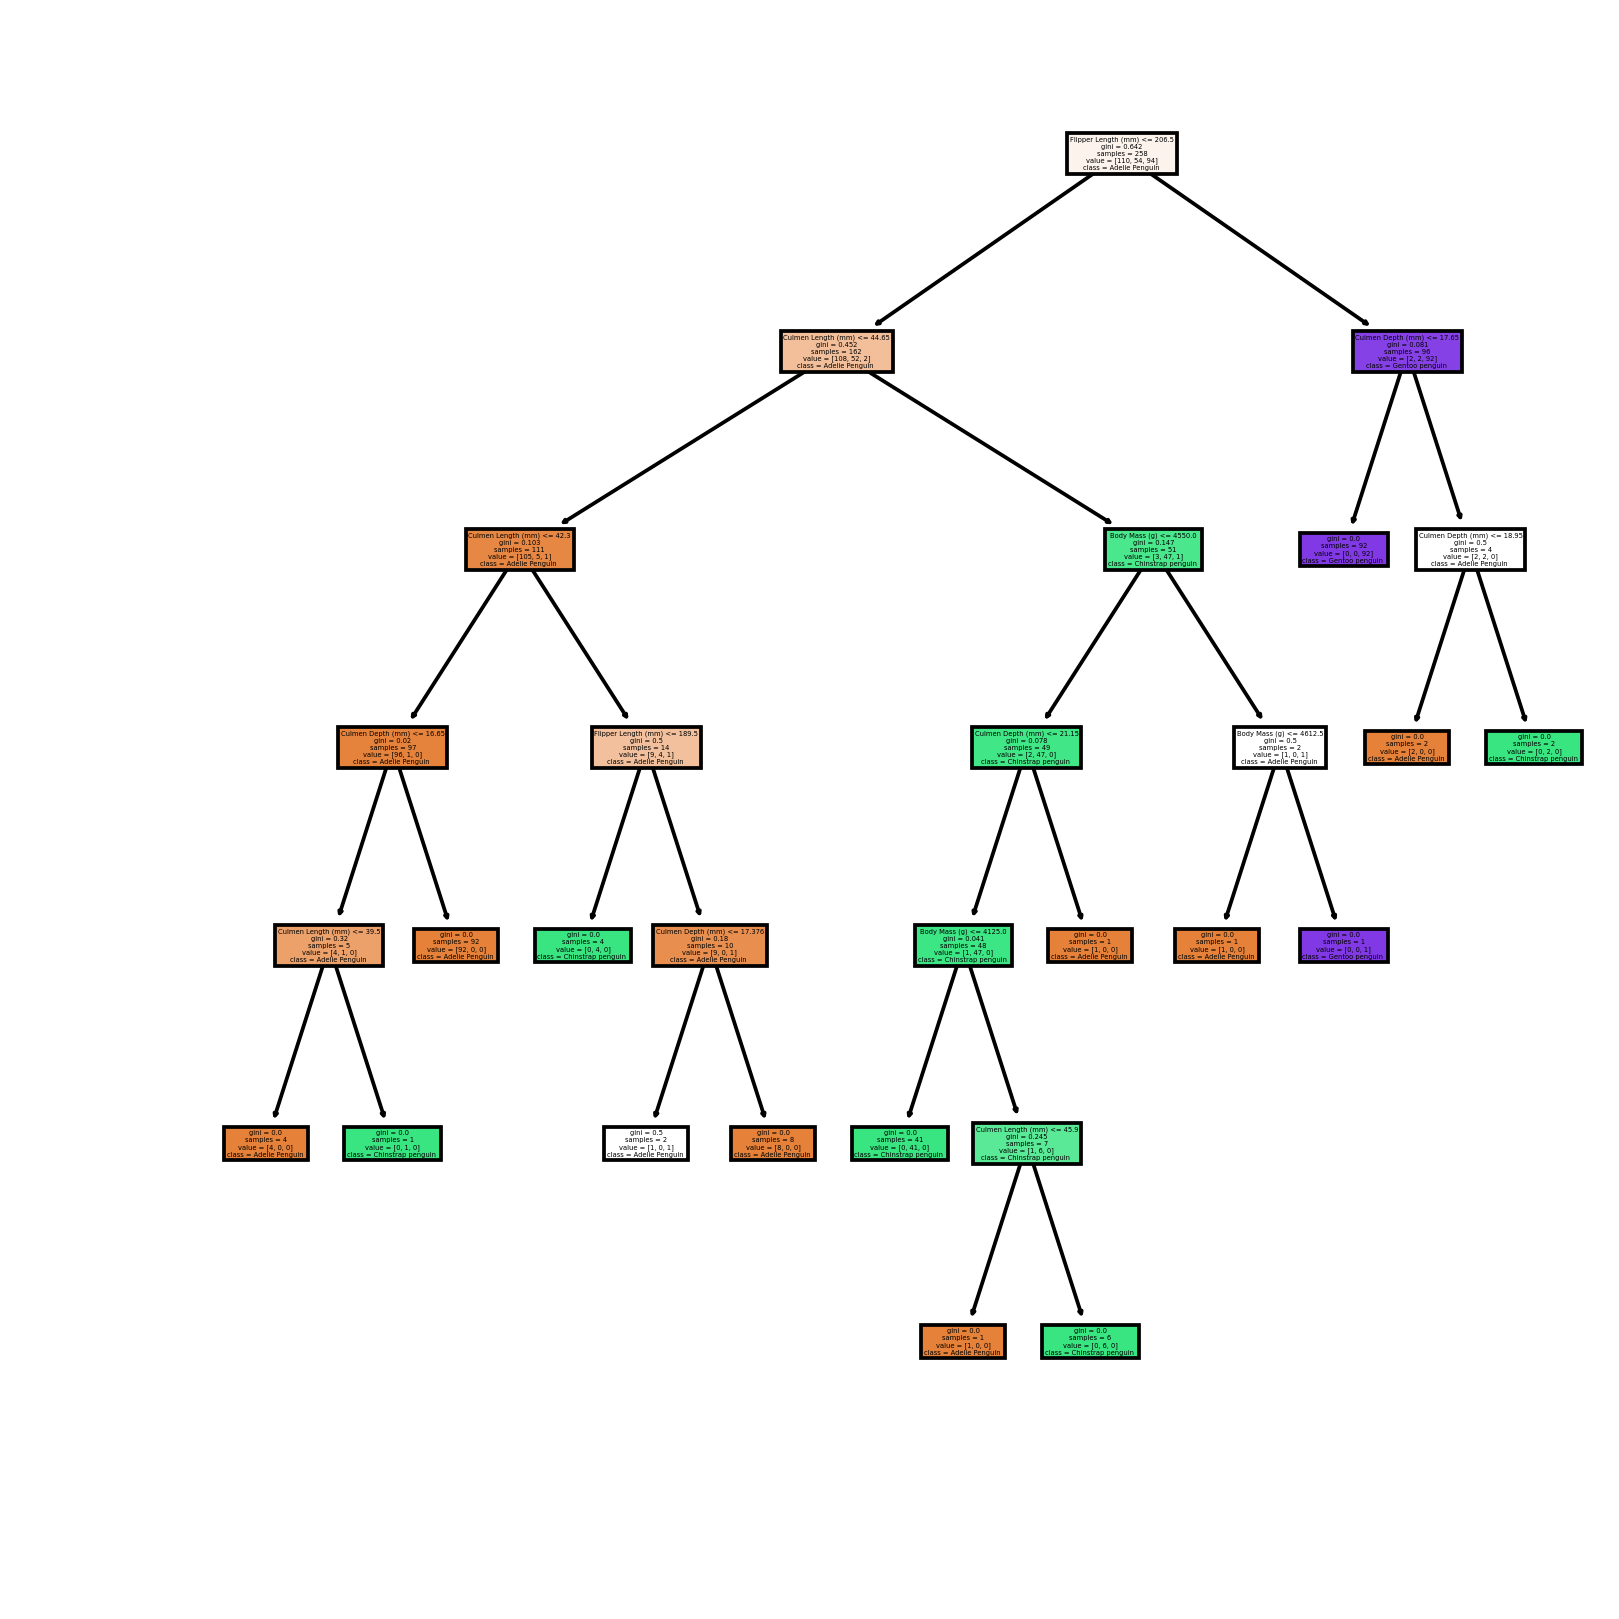

In [19]:
fn=['Culmen Length (mm)','Culmen Depth (mm)','Flipper Length (mm)','Body Mass (g)']
cn=['Adelie Penguin ', 'Chinstrap penguin ', 'Gentoo penguin ']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (6, 6), dpi=300)
tree.plot_tree(clf,
               feature_names = fn, 
               class_names=cn,
               filled = True);
#fig.savefig('Improve_tree.png')


### It was a nice experience working with the dataset.